<a href="https://colab.research.google.com/github/sahithidevarashetty/sahithi_INFO5731_Fall2021/blob/main/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 11/03/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


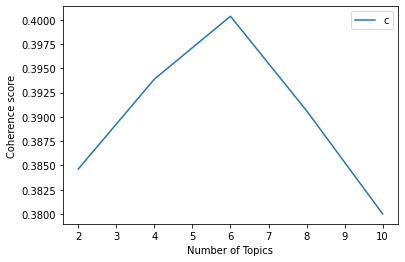

[0.3846375060441043, 0.3938889598689091, 0.4003613943169282, 0.39063782916569606, 0.3800122324780563]
0.4003613943169282
6
[(0, '0.081*"drive" + 0.081*"brother" + 0.081*"mother"'), (1, '0.093*"health" + 0.050*"feel" + 0.050*"perform"'), (2, '0.151*"good" + 0.151*"brocolli" + 0.151*"eat"'), (3, '0.031*"drive" + 0.031*"tension" + 0.031*"caus"'), (4, '0.031*"good" + 0.031*"brocolli" + 0.031*"mother"'), (5, '0.076*"health" + 0.076*"pressur" + 0.076*"drive"')]


In [2]:
# Write your code here
import nltk
import gensim
from gensim import corpora, models
from nltk.corpus import stopwords
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()   
en_stop = stopwords.words('english')
text_1 = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
text_2 = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
text_3 = "Some health experts suggest that driving may cause increased tension and blood pressure."
text_4 = "Health professionals say that brocolli is good for your health." 
text_5 = "My mother spends a lot of time driving my brother around to baseball practice."
all_text = [text_1, text_2, text_3, text_4, text_5]

def calculate_coherence_values(stop, dictionary, doc_term_matrix, doc_clean, start=2, step=3):
    
    all_models = []
    coherence_values = []
    for num_topics in range(start, stop, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)  
        all_models.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return all_models, coherence_values
texts = []


for i in all_text:    
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)  
    stop_tokens = [k for k in tokens if not k in en_stop]
    stemmed_tokens = [p_stemmer.stem(j) for j in stop_tokens]
    texts.append(stemmed_tokens)
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model_list, coherence_values = calculate_coherence_values(12,dictionary, corpus, texts, 2,2)

import matplotlib.pyplot as plt
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.ylabel("Coherence score")
plt.xlabel("Number of Topics")
plt.legend(("coherence_values"), loc='best')
plt.show()

n=max(coherence_values)
y=coherence_values.index(n)
y= (y+1)*2
print(coherence_values)
print(n)
print(y)
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=y, id2word = dictionary, passes=20)

print(ldamodel.print_topics(num_topics=y, num_words=3))




## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


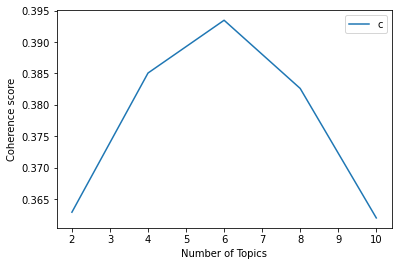

[0.36291465495615366, 0.38506312197983616, 0.39346380626612404, 0.3826104188808439, 0.3620043875366322]
0.39346380626612404
6
[(0, '0.424*"brocolli" + 0.424*"good" + 0.350*"eat"'), (1, '0.376*"drive" + -0.349*"good" + -0.349*"brocolli"'), (2, '-0.534*"health" + -0.250*"may" + -0.250*"tension"'), (3, '0.312*"lot" + 0.312*"practic" + 0.312*"time"'), (4, '-0.522*"health" + -0.353*"profession" + -0.353*"say"')]


In [4]:
# Write your code here

import nltk
import gensim
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer


nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')
en_stop = stopwords.words('english')
p_stemmer = PorterStemmer()   
text_1 = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
text_2 = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
text_3 = "Some health experts suggest that driving may cause increased tension and blood pressure."
text_4 = "Health professionals say that brocolli is good for your health." 
text_5 = "My mother spends a lot of time driving my brother around to baseball practice."
all_text = [text_1, text_2, text_3, text_4, text_5]
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)  # train model
        model_list.append(model)
        coher_momdel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coher_momdel.get_coherence())
    return model_list, coherence_values
results = []
for i in all_text:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stop_tokens = [j for j in tokens if not j in en_stop]
    stemmed_tokens = [p_stemmer.stem(k) for k in stop_tokens]
    results.append(stemmed_tokens)
dictionary = corpora.Dictionary(results)
corpus = [dictionary.doc2bow(text) for text in results]

model_list, coherence_values = compute_coherence_values(dictionary, corpus, results, 12,2,2)


import matplotlib.pyplot as plt
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
n=max(coherence_values)
y=coherence_values.index(n)
y= (y+1)*2
print(coherence_values)
print(n)
print(y)


lsamodel = gensim.models.lsimodel.LsiModel(corpus, num_topics=y, id2word = dictionary)  # train model
print(lsamodel.print_topics(num_topics=y, num_words=3))




## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [5]:
# Write your code here
import nltk; nltk.download('stopwords')
!python3 -m spacy download en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-16 04:47:44.784165: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
# Installing gensim and pyLDAvis modules
!pip install pyLDAvis==2.1.2
!pip install gensim==3.8.3
import re
import numpy as np
import pandas as pd
from pprint import pprint


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


import spacy


import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline


import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=a41e6372934964667a710a1634cf366b1f036d2db8651743fbe81599653047a7
  Stored in directory: /root/.cache/pip/wheels/31/8c/a0/24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 9.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [7]:


from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Write your code here
# Write your code here

#import modules
import os.path
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.models import LsiModel
import matplotlib.pyplot as plt

def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for l in fin.readlines():
            text = l.strip()
            documents.append(text)
    print("Total number of documents:",len(documents))
    titles.append( text[0:min(len(text),100)] )
    return documents,titles

def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
   
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for k in doc_set:
        raw = k.lower()
        tokens = tokenizer.tokenize(raw)
        stop_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(j) for j in stop_tokens]
        texts.append(stemmed_tokens)
    return texts


def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(i_doc) for i_doc in doc_clean]
    return dictionary,doc_term_matrix

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coher_model = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coher_model.get_coherence())
    return model_list, coherence_values

def plot_data(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
  
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()




## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)
""" 
I believe the LDA model gives greater accuracy than the LSA model based on the models' aforementioned implementation. due to the LSA model's inability to comprehendaccurately conveying a word's several meanings. For instance, the word "drive" has many connotations in the data utilized in the aforementioned statistics. One is driving a car, and the other is pushing. In the LSA model, its meaning has not been adequately explained. Driving well and brocolli don't go together very well. While the LDA model has performed better than the LSA model at interpreting meanings. Therefore, compared to LSA model, the topics suggested by LDA model make more sense.
"""

' \nI believe the LDA model gives greater accuracy than the LSA model based on the models\' aforementioned implementation. due to the LSA model\'s inability to comprehendaccurately conveying a word\'s several meanings. For instance, the word "drive" has many connotations in the data utilized in the aforementioned statistics. One is driving a car, and the other is pushing. In the LSA model, its meaning has not been adequately explained. Driving well and brocolli don\'t go together very well. While the LDA model has performed better than the LSA model at interpreting meanings. Therefore, compared to LSA model, the topics suggested by LDA model make more sense.\n'